Added progressively: all the "import" I need.

In [24]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
from matplotlib import pyplot as plt
from bokeh.plotting import *
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import HoverTool
tile_provider = get_provider(Vendors.CARTODBPOSITRON)

Extracting and arranging the dataset on Coup d'état.

In [25]:
coups = pd.read_csv("Data/Data per Coup.csv")

The countries are entered manually, as I selected which would be included in the dictionary: 
- I took the liberty to remove Réunion, as it is a "French" region.
- Egypt is present, as part of the African continent, not Asia.
- Somaliland is joined to Somalia; Western Sahara to Morocco, etc.

In [26]:
dictionary = {"Algeria": {}, "Egypt": {}, "Libya": {},
              "Morocco": {}, "Sudan": {}, "Tunisia": {},
              "Benin": {}, "Burkina Faso": {}, "Cape Verde": {},
              "Ivory Coast": {}, "Gambia": {}, "Ghana": {},
              "Guinea": {}, "Guinea-Bissau": {}, "Liberia": {},
              "Mali": {}, "Mauritania": {}, "Niger": {},
              "Nigeria": {}, "Senegal": {}, "Sierra Leone": {},
              "Togo": {}, "Angola": {}, "Cameroon": {},
              "Central African Republic": {}, "Chad": {},
              "Congo": {}, "Democratic Republic of the Congo": {},
              "Equatorial Guinea": {}, "Gabon": {},
              "Sao Tome and Principe": {}, "Burundi": {},
              "Comoros": {}, "Djibouti": {}, "Ethiopia": {},
              "Eritrea": {}, "Kenya": {}, "Madagascar": {},
              "Malawi": {}, "Mauritius": {}, "Mozambique": {},
              "Rwanda": {}, "Seychelles": {}, "Somalia": {},
              "Tanzania": {}, "Uganda": {}, "Zambia": {},
              "Zimbabwe": {}, "Botswana": {}, "Lesotho": {},
              "Namibia": {}, "South Africa": {}, "Swaziland": {} }

My graphs will be by decade.

In [27]:
for key, value in dictionary.items():
    for i in range (1950, 2021, 10):
        key = value[i] = 0
gdps = dict(dictionary)

In [28]:
for row in coups.index:
    for key, value in dictionary.items():
        if coups["country"][row] == key:
            decade = int(str(coups["year"][row])[0:3] + "0")
            value[decade] += 1

Extracting and arranging the dataset on Wars.

In [29]:
wars = pd.read_csv("Data/Data Wars.csv")
wars = wars.replace('DR Congo (Zaire)', 'Democratic Republic of the Congo')
wars = wars.drop_duplicates(subset = ['location', 'year'], keep = False)

In [30]:
for i in wars.index:
    wars["location"][i] = wars['location'][i].split(", ")
exploded = wars.explode("location")

In [31]:
for row in wars.index:
    for key, value in dictionary.items():
        if wars["year"][row] >= 1950:
            if wars["location"][row][0] == key:
                decade = int(str(wars["year"][row])[0:3] + "0")
                value[decade] += 1

Saving the transformed data for later.

In [32]:
score_af = pd.DataFrame.from_dict(dictionary)
score_af.to_csv("Data/score_af.csv", index_label='Index_name')

Getting the scores per geographical region.

Manual separation of countries per region.

In [33]:
n = ["Algeria", "Egypt", "Libya", "Morocco","Sudan", "Tunisia"]

s = ["Botswana", "Lesotho", "Namibia", "South Africa", "Swaziland"]

c = ["Angola", "Cameroon", "Central African Republic", "Chad", "Congo", "Democratic Republic of the Congo", "Equatorial Guinea", "Gabon", "Sao Tome and Principe"]

e = ["Burundi", "Comoros", "Djibouti", "Ethiopia", "Eritrea", "Kenya", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Rwanda", "Seychelles", "Somalia", "Tanzania", "Uganda", "Zambia", "Zimbabwe"]

w = ["Benin", "Burkina Faso", "Cape Verde", "Ivory Coast", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Mauritania", "Niger", "Nigeria", "Senegal", "Sierra Leone", "Togo"]

pi_north = score_af.loc[:, n].mean(axis=1).tolist()
pi_south = score_af.loc[:, s].mean(axis=1).tolist()
pi_east = score_af.loc[:, e].mean(axis=1).tolist()
pi_west = score_af.loc[:, w].mean(axis=1).tolist()
pi_central = score_af.loc[:, c].mean(axis=1).tolist()

Extracting and arranging the (messy) dataset on GDP.

Given most of my datasets give the english names of the countries,
I had to change them to be able to match their dictionary key.

In [34]:
gdp = pd.read_csv("Data/Data GDP.csv")
gdp = gdp.replace('Congo, Dem. Rep.', 'Democratic Republic of the Congo')
gdp = gdp.replace('Congo, Rep.', 'Congo')
gdp = gdp.replace('Egypt, Arab Rep.', 'Egypt')
gdp = gdp.replace('Gambia, The', 'Gambia')
gdp = gdp.replace("Cote d'Ivoire", 'Ivory Coast')
gdp = gdp.replace('Cabo Verde', 'Cape Verde')
gdp = gdp.replace('Eswatini', 'Swaziland')

In [35]:
for i in range(1960, 2023):
    gdp[str(i)] = pd.to_numeric(gdp[str(i)], errors='coerce')

In [36]:
gdp_rows = []
for row in gdp.index:
    for key in dictionary.keys():
        if gdp["Country Name"][row] == key:
            gdp_rows.append(row)

In [37]:
gdp_africa = gdp.iloc[gdp_rows].reset_index(drop=True)

In [38]:
for row in gdp_africa.index:
    for key, value in gdps.items():        
        if gdp_africa["Country Name"][row] == key:
            decade = 1960
            column = 4
            while decade < 2030:
                gdp_decade = gdp_africa.iloc[row, column : column+10].mean()
                value[decade] = gdp_decade
                decade += 10
                column += 10

Saving the transformed data for later.

In [39]:
gdp_af = pd.DataFrame.from_dict(gdps)
gdp_af = gdp_af.mask(gdp_af < 15, 0)

gdp_af.to_csv("Data/gdp_af.csv", index_label='Index_name')

In [40]:
gdp_north = gdp_af.loc[:, n].mean(axis=1).tolist()
gdp_south = gdp_af.loc[:, s].mean(axis=1).tolist()
gdp_east = gdp_af.loc[:, e].mean(axis=1).tolist()
gdp_west = gdp_af.loc[:, w].mean(axis=1).tolist()
gdp_central = gdp_af.loc[:, c].mean(axis=1).tolist()

Production of the graphs.

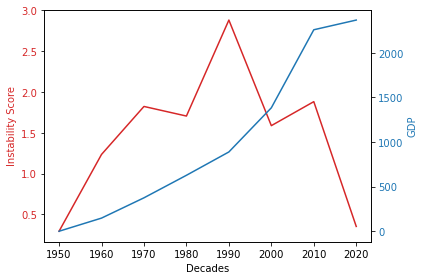

In [41]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Decades")
ax1.set_ylabel("Instability Score", color=color)
ax1.plot([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], pi_east, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('GDP', color=color)
ax2.plot([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], gdp_east, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig("Graphs GEO/East.png")

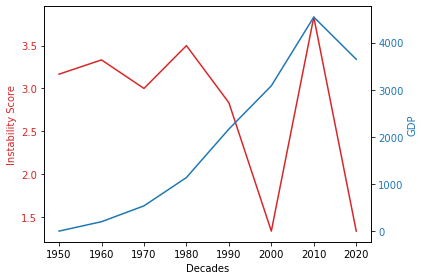

In [42]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Decades")
ax1.set_ylabel("Instability Score", color=color)
ax1.plot([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], pi_north, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('GDP', color=color)
ax2.plot([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], gdp_north, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig("Graphs GEO/North.png")

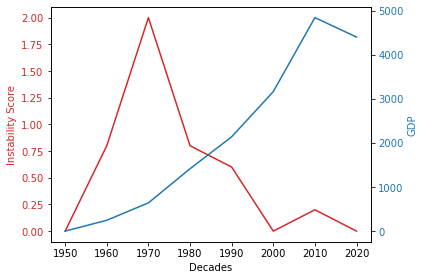

In [43]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Decades")
ax1.set_ylabel("Instability Score", color=color)
ax1.plot([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], pi_south, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('GDP', color=color)
ax2.plot([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], gdp_south, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig("Graphs GEO/South.png")

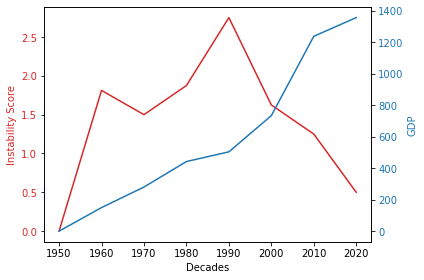

In [44]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Decades")
ax1.set_ylabel("Instability Score", color=color)
ax1.plot([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], pi_west, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('GDP', color=color)
ax2.plot([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], gdp_west, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig("Graphs GEO/West.png")

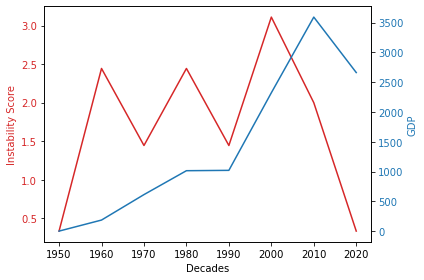

In [45]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Decades")
ax1.set_ylabel("Instability Score", color=color)
ax1.plot([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], pi_central, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('GDP', color=color)
ax2.plot([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], gdp_central, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig("Graphs GEO/Central.png")

Creation of the GEO interactive map.

In [47]:
output_file("GEO.html")

source = ColumnDataSource(
        data=dict(
            x=[2000000, 4200000, 0, 2000000, 2400000],
            y=[0, -400000, 1200000, 2600000, -2800000],
            imgs = [
                'Graphs GEO/Central.png',
                'Graphs GEO/East.png',
                'Graphs GEO/West.png',
                'Graphs GEO/North.png',
                'Graphs GEO/South.png']))

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" alt="@imgs";
                    margin: 5px 5px 5px 5px;"
                    border="1"
                ></img>
            </div>
        </div>
        """
    )

geo = figure(title='Visualization per geographical region \n(Hover over the dots to see the graphs)',
           plot_width=500, plot_height=650,
           x_range=(-2000000, 6000000),
           y_range=(-4000000, 4000000), x_axis_type='mercator',
           y_axis_type='mercator', tools=[hover])

geo.add_tile(tile_provider)

geo.circle('x', 'y', size=10, source=source)
show(geo)